# Data
The dataset used for this project can be obtained from the official Boston bike sharing system website: https://www.bluebikes.com/system-data.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

#Following files where provided:  
#weather_hourly_boston.csv  
#boston_2016.csv  

#The dataset for current_bluebikes_stations was accessed from [1].

In [3]:
weather_data = pd.read_csv('provided_data/weather_hourly_boston.csv')
weather_data.head(3)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0


In [4]:
trip_data = pd.read_csv('provided_data/boston_2016.csv')
trip_data.head(3)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber


In [5]:
station_data = pd.read_csv('provided_data/current_bluebikes_stations.csv')
station_data.head(3)

,Number,Name,Latitude,Longitude,District,Public,Total docks
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18


# Cleaning data
The process of data cleaning was shared by the group, everyone had the task to familiarize themselves with the data.  
This way we could have an open discussion about the dataset afterwards.

## Type conversion
Necessary conversion of not correctly represented objects in the datasets.

### Weather
Column 'date_time' is the only attribute with an object type, useful to convert into datetime type.

Column 'precip' as our precipitation value (forecast for rain, snowfall...) and with '0' and '1' as only acceptable values. 

In [6]:
weather_data.info()
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])
weather_data['precip'] = weather_data['precip'].astype('Int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


### Trips
Similar to the weather dataframe, the columns 'start_time' and 'end_time' are the only attributes with an object type, useful to convert.

In [7]:
trip_data.info()
trip_data['start_time'] = pd.to_datetime(trip_data['start_time'])
trip_data['end_time'] = pd.to_datetime(trip_data['end_time'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1236203 non-null  object
 1   end_time            1236203 non-null  object
 2   start_station_id    1236203 non-null  int64 
 3   end_station_id      1236203 non-null  int64 
 4   start_station_name  1236203 non-null  object
 5   end_station_name    1236203 non-null  object
 6   bike_id             1236203 non-null  int64 
 7   user_type           1236203 non-null  object
dtypes: int64(3), object(5)
memory usage: 75.5+ MB


In [10]:
path = r'aditional_other_data/'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    other_data = pd.read_csv(filename, index_col=None, header=0)
    li.append(other_data)

other_blue_bikes = pd.concat(li, axis=0, ignore_index=True)
other_blue_bikes.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,196,2016-11-01 00:00:35,2016-11-01 00:03:52,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,78,Union Square - Somerville,42.379637,-71.095319,1380,Subscriber,1983,2
1,222,2016-11-01 00:01:23,2016-11-01 00:05:06,23,Mayor Martin J Walsh - 28 State St,42.358920,-71.057629,190,Nashua Street at Red Auerbach Way,42.365598,-71.064248,866,Subscriber,1980,1
2,483,2016-11-01 00:04:19,2016-11-01 00:12:22,178,MIT Pacific St at Purrington St,42.359573,-71.101295,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,-71.103934,35,Subscriber,1990,1
3,141,2016-11-01 00:05:31,2016-11-01 00:07:53,25,Tremont St / W Newton St,42.341332,-71.076847,21,Prudential Center / Belvidere,42.345959,-71.082578,1917,Customer,\N,0
4,154,2016-11-01 00:05:59,2016-11-01 00:08:34,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,139,Dana Park,42.361589,-71.107437,603,Subscriber,1990,1


### Stations
No necessary datatype conversions found.

In [12]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Number       415 non-null    object 
 1   Name         415 non-null    object 
 2   Latitude     415 non-null    float64
 3   Longitude    415 non-null    float64
 4   District     415 non-null    object 
 5   Public       415 non-null    object 
 6   Total docks  415 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 22.8+ KB


## Missing values
Identifying and handling
- Checking for null/NaN values in datasets
- Checking for missing values 

### Weather
Limiting our weather dataset to year 2016, only needed to match our Boston 2016 trip data.

Weather data contains few missing values in the complete weather dataset, but none missing limited to 2016 data.
A similar case for missing values in the continuous timeframe of the weather data. The whole dataset contains gaps of 26 hours where weather data is missing. Our set limited to 2016 has maximum gaps of 3 hours.

Thereby we chose to not impute the weather data, since we have sufficient data to merge trip data with nearest weather data (1:30h gaps at most).

In [13]:
weather_data_2016 = weather_data[(weather_data['date_time'] >= pd.Timestamp(2016,1,1)) & (weather_data['date_time'] < pd.Timestamp(2017,1,1))].sort_values('date_time')

In [14]:
print(f'Amount of missing values in weather_data dataset: {weather_data.isna().sum()}')
print(f'Amount of missing values in weather_data dataset: {weather_data_2016.isna().sum()}')

Amount of missing values in weather_data dataset: date_time    494
max_temp     494
min_temp     494
precip       492
dtype: int64
Amount of missing values in weather_data dataset: date_time    0
max_temp     0
min_temp     0
precip       0
dtype: int64


In [15]:
print(f'Top 5 missing data timeframes in whole weather data set')
print(weather_data.date_time.diff().nlargest(5))
print(f'Top 5 missing data timeframes in 2016')
print(weather_data_2016.date_time.diff().nlargest(5))

Top 5 missing data timeframes in whole weather data set
72    1 days 02:00:00
360   1 days 02:00:00
648   1 days 02:00:00
792   1 days 02:00:00
936   1 days 02:00:00
Name: date_time, dtype: timedelta64[ns]
Top 5 missing data timeframes in 2016
9009    0 days 03:00:00
9133    0 days 03:00:00
9441    0 days 03:00:00
10576   0 days 03:00:00
11780   0 days 03:00:00
Name: date_time, dtype: timedelta64[ns]


### Trips  
No missing values where found in the blue_bikes dataset.

In [16]:
print(f'Amount of missing values in blue_bikes dataset: {trip_data.isna().sum()}')

Amount of missing values in blue_bikes dataset: start_time            0
end_time              0
start_station_id      0
end_station_id        0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
dtype: int64


### Stations
No missing values where found in the station dataset.

In [17]:
print(f'Amount of missing values in station_locations dataset: {station_data.isna().sum()}')

Amount of missing values in station_locations dataset: Number         0
Name           0
Latitude       0
Longitude      0
District       0
Public         0
Total docks    0
dtype: int64


## Duplicates


### Weather
1. Checking weather for duplicates and dropping them.
2. Checking weather for duplicated date_time entries. 
  
Entries seem to be very similar, appear to often be followed by 1 hour gaps in the timeframe, so we only keep the first entry.

In [18]:
print(f'Weather dataframe has the following duplicates: {weather_data_2016[weather_data_2016.duplicated()].count()}')
weather_data.drop_duplicates(inplace= True)

Weather dataframe has the following duplicates: date_time    99
max_temp     99
min_temp     99
precip       99
dtype: int64


In [19]:
print(f"Weather dataframe has : {weather_data_2016.duplicated(subset=['date_time'], keep= False).sum()} not unqiue date time entries")

Weather dataframe has : 880 not unqiue date time entries


In [20]:
 weather_data_2016[weather_data_2016.duplicated(subset=['date_time'], keep= False) == True]

,date_time,max_temp,min_temp,precip
8848,2016-01-04 17:00:00,-3.9,-3.9,1
8849,2016-01-04 17:00:00,-3.9,-3.9,1
8836,2016-01-05 05:00:00,-10.0,-10.0,0
8861,2016-01-05 05:00:00,-11.1,-11.1,0
8933,2016-01-08 06:00:00,-0.6,-0.6,0
...,...,...,...,...
17491,2016-12-29 19:00:00,3.3,2.8,1
17492,2016-12-29 21:00:00,4.4,4.4,1
17493,2016-12-29 21:00:00,4.4,4.4,1
17514,2016-12-30 19:00:00,2.8,2.8,0


In [21]:
weather_data_2016 = weather_data_2016[weather_data_2016.duplicated(subset=['date_time'], keep= 'first') == False]
weather_data_2016.reset_index()

,index,date_time,max_temp,min_temp,precip
0,8759,2016-01-01 00:00:00,5.6,5.6,0
1,8736,2016-01-01 01:00:00,5.0,5.0,0
2,8737,2016-01-01 02:00:00,5.0,5.0,0
3,8738,2016-01-01 03:00:00,4.4,4.4,0
4,8739,2016-01-01 04:00:00,4.4,4.4,0
...,...,...,...,...,...
8245,17538,2016-12-31 19:00:00,1.7,1.7,0
8246,17539,2016-12-31 20:00:00,1.7,1.7,0
8247,17540,2016-12-31 21:00:00,1.7,1.7,0
8248,17541,2016-12-31 22:00:00,2.2,2.2,0


### Trips

In [22]:
print(f'Trip dataframe has the following duplicates: {trip_data[trip_data.duplicated()].count()}')

Trip dataframe has the following duplicates: start_time            0
end_time              0
start_station_id      0
end_station_id        0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
dtype: int64


### Stations

In [23]:
print(f'Stations dataframe has the following duplicates: {station_data[station_data.duplicated()].count()}')

Stations dataframe has the following duplicates: Number         0
Name           0
Latitude       0
Longitude      0
District       0
Public         0
Total docks    0
dtype: int64


## Extreme values


### Weather
Looking at extreme temperature differences and checking if they are feasible.

To check if our extreme outliers are realistic we checked other weather sources and they match other data sources.

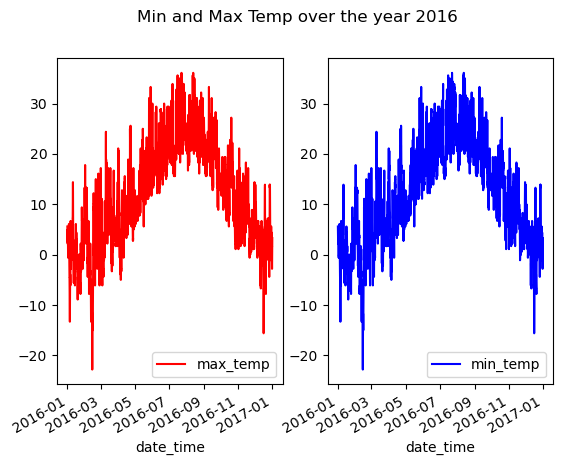

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Min and Max Temp over the year 2016')


weather_data_2016 = weather_data_2016[(weather_data_2016['date_time'] >= pd.Timestamp(2016,1,1)) & (weather_data_2016['date_time'] < pd.Timestamp(2017,1,1))]

weather_data_2016.plot(kind='line',x='date_time',y='max_temp', color='red', ax=ax1)
weather_data_2016.plot(kind='line',x='date_time',y='min_temp', color='blue', ax=ax2)

plt.show()

In [25]:
print(f"The warmest records: {weather_data_2016.loc[weather_data_2016['max_temp'] == weather_data_2016.max_temp.max()]} \n")
print(f"The coldest records: {weather_data_2016.loc[weather_data_2016['min_temp'] == weather_data_2016.min_temp.min()]} ")


The warmest records:                 date_time  max_temp  min_temp  precip
13651 2016-07-22 20:00:00      36.1      36.1       0
14154 2016-08-12 19:00:00      36.1      36.1       0 

The coldest records:                date_time  max_temp  min_temp  precip
9824 2016-02-14 09:00:00     -22.8     -22.8       0
9825 2016-02-14 10:00:00     -22.8     -22.8       0
9826 2016-02-14 11:00:00     -22.8     -22.8       0
9827 2016-02-14 12:00:00     -22.8     -22.8       0 


### Trips
Checking for extreme long trip durations, due to:
- possible errors in the data management
- errors in the data transfer from bikes
- users forgetting to log off from bikes (renting them for days by accident)

As blue bike rental costs 2.50$ every 30 minutes, we don't think longtime renting bikes is intentional. Hence we decided all trips over 24 hours are somehow flawed and to remove them.

Result: 1079 entries deleted (from originally 1.236.203) = 0,00087%




In [26]:
trip_data['tripduration'] = abs((trip_data.end_time - trip_data.start_time))

In [27]:
print('The 10 longest trips: ')
trip_data[['tripduration']].sort_values(by= 'tripduration', ascending= False).head(10)

The 10 longest trips: 


,tripduration
1231075,346 days 03:14:39.423000
1233211,167 days 20:54:24.092000
1228214,124 days 10:06:15.094000
608164,123 days 04:06:04
1362,89 days 23:03:02
1194974,89 days 06:58:50.921000
712894,85 days 01:46:44
543557,85 days 01:31:05
628018,78 days 20:09:39
23237,72 days 18:09:55


In [28]:
trip_data[['tripduration']]
trip_data = trip_data[trip_data['tripduration'] <= pd.Timedelta(24, unit='h')]
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235124 entries, 0 to 1236202
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235124 non-null  datetime64[ns] 
 1   end_time            1235124 non-null  datetime64[ns] 
 2   start_station_id    1235124 non-null  int64          
 3   end_station_id      1235124 non-null  int64          
 4   start_station_name  1235124 non-null  object         
 5   end_station_name    1235124 non-null  object         
 6   bike_id             1235124 non-null  int64          
 7   user_type           1235124 non-null  object         
 8   tripduration        1235124 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 94.2+ MB


## Data alignment
We see that in the dataset, there are 276 unique station names, but only 189 unique station identifieres. This is a problem since we need a 1:1 match between station name and ID. To change this, we first sort the dataset by station ID and station name. Then we reindex the dataset so that we can iterate over the sorted rows.

In [29]:
print('Anzahl Unique start_station_id = ' + str(trip_data['start_station_id'].nunique()))
print('Anzahl Unique start_station_name = ' + str(trip_data['start_station_name'].nunique()))
print('Anzahl Unique end_station_id = ' + str(trip_data['end_station_id'].nunique()))
print('Anzahl Unique end_station_name = ' + str(trip_data['end_station_name'].nunique()))

Anzahl Unique start_station_id = 189
Anzahl Unique start_station_name = 276
Anzahl Unique end_station_id = 189
Anzahl Unique end_station_name = 274


In [30]:
#create mapping
trip_data.sort_values(by=['start_station_id','start_station_name'],inplace =True)
name_mapping = trip_data[['start_station_id','start_station_name']].drop_duplicates(subset = 'start_station_id',keep = 'first')
name_mapping.set_index('start_station_id',inplace = True, drop = True)
name_mapping

,start_station_name
start_station_id,
1,18 Dorrance Warehouse
3,Colleges of the Fenway
4,Tremont St at E Berkeley St
5,Northeastern U / North Parking Lot
6,Cambridge St at Joy St
...,...
215,The Eddy - New St at Sumner St
216,Glendon St at Condor St
217,Orient Heights T Stop - Bennington St at Sarat...


In [31]:
# drop columns
new_trip_data = trip_data.drop(columns=['start_station_name','end_station_name'])

# merge on start_station_id
new_trip_data = new_trip_data.merge(name_mapping, left_on='start_station_id', right_on='start_station_id')

# merge on end_station_id
name_mapping.columns = ['end_station_name']
new_trip_data = new_trip_data.merge(name_mapping, left_on='end_station_id', right_on='start_station_id')

new_trip_data

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,tripduration,start_station_name,end_station_name
0,2016-01-04 17:11:12,2016-01-04 17:29:21,1,96,1549,Subscriber,0 days 00:18:09,18 Dorrance Warehouse,Cambridge Main Library at Broadway / Trowbridg...
1,2016-03-14 17:08:46,2016-03-14 17:25:10,1,96,107,Subscriber,0 days 00:16:24,18 Dorrance Warehouse,Cambridge Main Library at Broadway / Trowbridg...
2,2016-05-12 20:22:40,2016-05-12 20:49:10,3,96,380,Subscriber,0 days 00:26:30,Colleges of the Fenway,Cambridge Main Library at Broadway / Trowbridg...
3,2016-05-28 14:40:48,2016-05-28 15:07:16,3,96,1017,Customer,0 days 00:26:28,Colleges of the Fenway,Cambridge Main Library at Broadway / Trowbridg...
4,2016-05-28 14:40:48,2016-05-28 15:07:22,3,96,1558,Customer,0 days 00:26:34,Colleges of the Fenway,Cambridge Main Library at Broadway / Trowbridg...
...,...,...,...,...,...,...,...,...,...
1235119,2016-10-02 21:20:22,2016-10-02 21:38:17,217,210,1892,Customer,0 days 00:17:55,Orient Heights T Stop - Bennington St at Sarat...,Bennington St at Byron St
1235120,2016-11-11 14:22:58,2016-11-11 14:32:14,217,210,1709,Subscriber,0 days 00:09:16,Orient Heights T Stop - Bennington St at Sarat...,Bennington St at Byron St
1235121,2016-11-13 12:09:06,2016-11-13 12:32:46,217,210,1910,Customer,0 days 00:23:40,Orient Heights T Stop - Bennington St at Sarat...,Bennington St at Byron St
1235122,2016-11-14 12:00:28,2016-11-14 12:05:39,217,210,1897,Subscriber,0 days 00:05:11,Orient Heights T Stop - Bennington St at Sarat...,Bennington St at Byron St


In [32]:
print('Anzahl Unique start_station_id = ' + str(new_trip_data['start_station_id'].nunique()))
print('Anzahl Unique start_station_name = ' + str(new_trip_data['start_station_name'].nunique()))
print('Anzahl Unique end_station_id = ' + str(new_trip_data['end_station_id'].nunique()))
print('Anzahl Unique end_station_name = ' + str(new_trip_data['end_station_name'].nunique()))

Anzahl Unique start_station_id = 189
Anzahl Unique start_station_name = 189
Anzahl Unique end_station_id = 189
Anzahl Unique end_station_name = 189


# Merge
## Geolocations
Getting lat_lon sation_id reference list from other_blue_bikes data

In [38]:
# get the right columns and rename them 
start_columns_other_blue_bikes = other_blue_bikes[['start station id','start station name','start station latitude', 'start station longitude']].drop_duplicates()

end_columns_other_blue_bikes = other_blue_bikes[['end station id','end station name','end station latitude', 'end station longitude']].drop_duplicates()

start_columns_other_blue_bikes.columns = ['station_id', 'station_name', 'latitude', 'longitude']
end_columns_other_blue_bikes.columns = ['station_id', 'station_name', 'latitude', 'longitude']

lat_lon_reference = pd.concat([start_columns_other_blue_bikes,end_columns_other_blue_bikes], axis = 0, ignore_index= True).copy()



lat_lon_reference = lat_lon_reference.drop_duplicates()

In [39]:
# multiple stations have slightly different lat / lon values 
lat_lon_reference.sort_values(by = 'station_name', ascending = False).head(10)

,station_id,station_name,latitude,longitude
197,45,Yawkey Way at Boylston St.,42.344681,-71.097853
135,45,Yawkey Way at Boylston St.,42.344706,-71.097515
30,99,Wilson Square,42.385582,-71.113341
34,121,West Broadway at Dorchester St,42.335693,-71.045859
35,161,West Broadway at D Street,42.339109,-71.051443
268,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271
29,160,Wentworth Institute of Technology,42.337596,-71.096391
188,218,Watermark Seaport - Boston Wharf Rd at Seaport...,42.351586,-71.045693
85,218,Watermark Seaport,42.351543,-71.045730
73,26,Washington St. at Waltham St.,42.341522,-71.068922


In [40]:
lat_lon_reference.sort_values(by='station_id').groupby(['station_id'], as_index=False).head(10)

,station_id,station_name,latitude,longitude
177,1,18 Dorrance Warehouse,42.387151,-71.075978
261,3,Colleges of the Fenway - Fenway at Avenue Loui...,42.340115,-71.100619
153,3,Colleges of the Fenway,42.340021,-71.100812
200,4,Tremont St at E Berkeley St,42.345392,-71.069616
59,4,Tremont St. at Berkeley St.,42.345392,-71.069616
...,...,...,...,...
178,217,Orient Heights T Stop - Bennington St at Sarat...,42.386732,-71.006212
85,218,Watermark Seaport,42.351543,-71.045730
188,218,Watermark Seaport - Boston Wharf Rd at Seaport...,42.351586,-71.045693
185,219,Central Square East Boston - Porter Street at ...,42.374301,-71.038087


As we can see, some station ids have multiple lat / long werde. To cope with that we use modus imputation

In [41]:
unique_lat_lon_reference = lat_lon_reference.groupby(['station_id'],  as_index = False).agg({'latitude': lambda x: x.value_counts().index[0], 'longitude': lambda x: x.value_counts().index[0]}).copy()

unique_lat_lon_reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  189 non-null    int64  
 1   latitude    189 non-null    float64
 2   longitude   189 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.6 KB


In [42]:
start_lat_lon = unique_lat_lon_reference.copy()
start_lat_lon.columns = 'start_' + start_lat_lon.columns

end_lat_lon = unique_lat_lon_reference.copy()
end_lat_lon.columns = 'end_' + end_lat_lon.columns

blue_bikes_with_geo = pd.merge(new_trip_data, start_lat_lon, on = 'start_station_id', how = 'left')
blue_bikes_with_geo = pd.merge(blue_bikes_with_geo, end_lat_lon, on = 'end_station_id', how = 'left')

blue_bikes_with_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235124 entries, 0 to 1235123
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235124 non-null  datetime64[ns] 
 1   end_time            1235124 non-null  datetime64[ns] 
 2   start_station_id    1235124 non-null  int64          
 3   end_station_id      1235124 non-null  int64          
 4   bike_id             1235124 non-null  int64          
 5   user_type           1235124 non-null  object         
 6   tripduration        1235124 non-null  timedelta64[ns]
 7   start_station_name  1235124 non-null  object         
 8   end_station_name    1235124 non-null  object         
 9   start_latitude      1235124 non-null  float64        
 10  start_longitude     1235124 non-null  float64        
 11  end_latitude        1235124 non-null  float64        
 12  end_longitude       1235124 non-null  float64        
dt

## Weather and GeoTrip data

In [43]:
# create new columns

start_weather_data = weather_data_2016.copy()
start_weather_data.columns = 'start_' + start_weather_data.columns

end_weather_data = weather_data_2016.copy()
end_weather_data.columns = 'end_' + end_weather_data.columns

In [44]:
start_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8250 entries, 8759 to 17542
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_date_time  8250 non-null   datetime64[ns]
 1   start_max_temp   8250 non-null   float64       
 2   start_min_temp   8250 non-null   float64       
 3   start_precip     8250 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), float64(2)
memory usage: 330.3 KB


In [45]:
geo_bikes_with_weather = pd.merge_asof(blue_bikes_with_geo.sort_values(by='start_time'), start_weather_data.sort_values(by='start_date_time'), left_on='start_time', right_on= 'start_date_time', direction= 'nearest')
geo_bikes_with_weather = pd.merge_asof(geo_bikes_with_weather.sort_values(by='end_time'), end_weather_data.sort_values(by='end_date_time'), left_on='end_time', right_on= 'end_date_time', direction= 'nearest')

In [46]:
geo_bikes_with_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235124 entries, 0 to 1235123
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235124 non-null  datetime64[ns] 
 1   end_time            1235124 non-null  datetime64[ns] 
 2   start_station_id    1235124 non-null  int64          
 3   end_station_id      1235124 non-null  int64          
 4   bike_id             1235124 non-null  int64          
 5   user_type           1235124 non-null  object         
 6   tripduration        1235124 non-null  timedelta64[ns]
 7   start_station_name  1235124 non-null  object         
 8   end_station_name    1235124 non-null  object         
 9   start_latitude      1235124 non-null  float64        
 10  start_longitude     1235124 non-null  float64        
 11  end_latitude        1235124 non-null  float64        
 12  end_longitude       1235124 non-null  float64        
 1

In [47]:
geo_bikes_with_weather['weather_data_check'] = abs((geo_bikes_with_weather.start_time - geo_bikes_with_weather.start_date_time).round('10min'))

In [48]:
geo_bikes_with_weather.groupby('weather_data_check').weather_data_check.count()


weather_data_check
0 days 00:00:00    191739
0 days 00:10:00    393395
0 days 00:20:00    393866
0 days 00:30:00    202491
0 days 00:40:00     21299
0 days 00:50:00     20862
0 days 01:00:00     10421
0 days 01:10:00       424
0 days 01:20:00       415
0 days 01:30:00       212
Name: weather_data_check, dtype: int64

In [49]:
geo_bikes_with_weather.drop('weather_data_check', inplace= True, axis = 1)

As predicted while handling missing values, our oldest weather data seems to be 90 minutes old, which is in our eyes okay.

In [50]:
geo_bikes_with_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235124 entries, 0 to 1235123
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235124 non-null  datetime64[ns] 
 1   end_time            1235124 non-null  datetime64[ns] 
 2   start_station_id    1235124 non-null  int64          
 3   end_station_id      1235124 non-null  int64          
 4   bike_id             1235124 non-null  int64          
 5   user_type           1235124 non-null  object         
 6   tripduration        1235124 non-null  timedelta64[ns]
 7   start_station_name  1235124 non-null  object         
 8   end_station_name    1235124 non-null  object         
 9   start_latitude      1235124 non-null  float64        
 10  start_longitude     1235124 non-null  float64        
 11  end_latitude        1235124 non-null  float64        
 12  end_longitude       1235124 non-null  float64        
 1

# Saving in file
Saving as CSV does not save the datatypes within the file.
We would need an own functionality to save datatypes and parse columns accordingly.

Saving with to_pickle preserves datatypes
read with:
df = pd.read_pickle('drive/MyDrive/A&A_Team4/PreprocessedDataframe.pk')

In [52]:
geo_bikes_with_weather.to_csv('PreprocessedDataframe.csv')

In [53]:
geo_bikes_with_weather.to_pickle('PreprocessedDataframe.pk')
weather_data_2016.to_pickle('PreprocessedWeatherData.pk')

# References

[1] Bluebikes, "System Data", 2021. [Online]. Available: Bluebikes, https://www.bluebikes.com/system-data. [Accessed January 31, 2022].